##HANDWRITTEN DIGIT DETECTION USING TENSORFLOW

In [0]:
import torch
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as func

In [0]:
train = datasets.MNIST("",train=True,download=True,transform = transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("",train=False,download=True,transform = transforms.Compose([transforms.ToTensor()]))


Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw
Processing...
Done!


In [0]:
trainset = torch.utils.data.DataLoader(train,batch_size=10,shuffle=True)
testset = torch.utils.data.DataLoader(test,batch_size=10,shuffle=True)

tensor([8, 0, 2, 2, 6, 6, 1, 7, 0, 7])


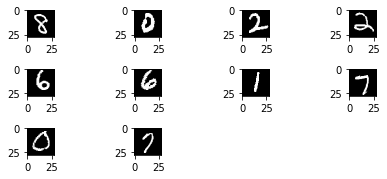

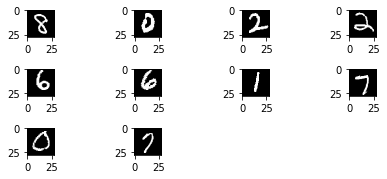

In [0]:
fig = plt.figure()
i = 0
for x in trainset:
  for j in x[0]:
    plt.subplot(5,4,i+1)
    plt.tight_layout()
    plt.imshow(j.view(28,28),cmap='gray',interpolation='none')
    i+=1
  print(x[1])
  break
fig

In [0]:
counter_ele = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0}
for data in trainset:
  xs, ys = data
  for y in ys:
    counter_ele[int(y)]+=1

print(counter_ele)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [0]:
import torch.nn as nn
import torch.nn.functional as func

In [0]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(28*28, 64)
    self.fc2 = nn.Linear(64, 64)
    self.fc3 = nn.Linear(64, 64)
    self.fc4 = nn.Linear(64, 10)
  def forward(self,x):
    x = func.relu(self.fc1(x))
    x = func.relu(self.fc2(x))
    x = func.relu(self.fc3(x))
    x = self.fc4(x)
    return func.log_softmax(x,dim=1)

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [0]:
samplex = torch.rand((28,28))
print(samplex)
output = net(samplex.view(-1,28*28))
print(output)

tensor([[0.7046, 0.0398, 0.5358, 0.2470, 0.8462, 0.2087, 0.7594, 0.3441, 0.9516,
         0.9782, 0.7000, 0.9056, 0.6924, 0.5605, 0.4653, 0.2151, 0.9240, 0.6491,
         0.8402, 0.5385, 0.6734, 0.4859, 0.0092, 0.4498, 0.5749, 0.7196, 0.3735,
         0.9428],
        [0.0774, 0.7735, 0.3238, 0.3137, 0.4022, 0.4199, 0.5752, 0.9704, 0.2712,
         0.1259, 0.0683, 0.6685, 0.3394, 0.6687, 0.1231, 0.6237, 0.2110, 0.9414,
         0.9466, 0.0047, 0.5743, 0.9768, 0.0417, 0.2547, 0.0629, 0.7955, 0.4250,
         0.3432],
        [0.5756, 0.4016, 0.5489, 0.7627, 0.9444, 0.8866, 0.6433, 0.6023, 0.6788,
         0.4934, 0.6619, 0.9912, 0.8475, 0.8515, 0.3729, 0.5523, 0.6890, 0.2399,
         0.9418, 0.6240, 0.8770, 0.7955, 0.8903, 0.0150, 0.0203, 0.5895, 0.7565,
         0.2996],
        [0.2479, 0.0271, 0.1556, 0.2983, 0.1909, 0.3674, 0.9723, 0.4699, 0.9982,
         0.9711, 0.0773, 0.2616, 0.9505, 0.7471, 0.4107, 0.0063, 0.4139, 0.5002,
         0.6390, 0.8252, 0.5314, 0.0452, 0.1045, 0.9346

In [0]:
import torch.optim as optim
optimizer = optim.Adam(net.parameters(),lr=0.001)
EPOCHS = 4

In [0]:
#data is a batch of images and labels
for i in range(EPOCHS):
  for data in trainset:
    x,y = data
    net.zero_grad()
    output = net(x.view(-1,28*28))
    loss = func.nll_loss(output,y)
    loss.backward()
    optimizer.step()
  print(loss)


tensor(0.1332, grad_fn=<NllLossBackward>)
tensor(0.2890, grad_fn=<NllLossBackward>)
tensor(0.0553, grad_fn=<NllLossBackward>)
tensor(0.0482, grad_fn=<NllLossBackward>)


In [0]:
total = 0
correct = 0

with torch.no_grad():
  for data in testset:
    x,y = data
    output = net(x.view(-1,28*28))
    for idx,i in enumerate(output):
        if torch.argmax(i) == y[idx]:
          correct += 1
        total+=1

print('Accuracy is : ',correct/total)

Accuracy is :  0.9713


##CONVOLUTION NEURAL NETWORK

In [40]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /content/cats_and_dogs_filtered.zip

--2020-03-13 00:37:44--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.14.112, 2607:f8b0:4007:80e::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.14.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/content/cats_and_dogs_filtered.zip’

/content/cats_and_d 100%[===================>]  65.43M   392MB/s    in 0.2s    

2020-03-13 00:37:44 (392 MB/s) - ‘/content/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
import os
import zipfile
local_zip = '/content/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [0]:
import cv2
import numpy as np
from tqdm import tqdm

In [0]:
class CatsvsDogs():
  def __init__(self):
      self.IMG_SIZE = 150
      self.CATS = "cats_and_dogs_filtered/train/cats"
      self.DOGS = "cats_and_dogs_filtered/train/dogs"
      self.LABELS = {self.CATS:0,self.DOGS:1}
      self.CATS_VAL = "cats_and_dogs_filtered/validation/cats"
      self.DOGS_VAL = "cats_and_dogs_filtered/validation/dogs"
      self.LABELS_VAL = {self.CATS_VAL:0,self.DOGS_VAL:1}
      self.training_data = []
      self.testing_data = []
      self.catCount = 0
      self.dogCount = 0
      self.catCount_val = 0
      self.dogCount_val = 0
  
  def make_training_data(self):
    for label in self.LABELS:
      print(label)
      for f in tqdm(os.listdir(label)):
        path = os.path.join(label,f)
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img,(self.IMG_SIZE,self.IMG_SIZE))
        self.training_data.append([np.array(img),np.eye(2)[self.LABELS[label]]])
        if label == self.CATS:
          self.catCount+=1
        elif label == self.DOGS:
          self.dogCount+=1
    np.random.shuffle(self.training_data)
    np.save('training_data.npy',self.training_data)
    print('\ncats:',self.catCount)
    print('dogs:',self.dogCount)


  def make_testing_data(self) :
    for label in self.LABELS_VAL:
      print(label)
      for f in tqdm(os.listdir(label)):
        path = os.path.join(label,f)
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img,(self.IMG_SIZE,self.IMG_SIZE))
        self.testing_data.append([np.array(img),np.eye(2)[self.LABELS_VAL[label]]])
        if label == self.CATS_VAL:
          self.catCount_val+=1
        elif label == self.DOGS_VAL:
          self.dogCount_val+=1
    np.random.shuffle(self.testing_data)
    np.save('testing_data.npy',self.testing_data)
    print('\ncats:',self.catCount_val)
    print('dogs:',self.dogCount_val)

In [44]:
dogsvscats = CatsvsDogs()
dogsvscats.make_training_data()
dogsvscats.make_testing_data()

  9%|▉         | 91/1000 [00:00<00:01, 907.15it/s]

cats_and_dogs_filtered/train/cats


  9%|▉         | 89/1000 [00:00<00:01, 879.47it/s]

cats_and_dogs_filtered/train/dogs


 20%|█▉        | 98/500 [00:00<00:00, 969.57it/s]


cats: 1000
dogs: 1000
cats_and_dogs_filtered/validation/cats


 19%|█▉        | 94/500 [00:00<00:00, 939.36it/s]

cats_and_dogs_filtered/validation/dogs


100%|██████████| 500/500 [00:00<00:00, 851.39it/s]



cats: 500
dogs: 500


In [0]:
training_data = np.load('training_data.npy',allow_pickle=True)
testing_data = np.load('testing_data.npy',allow_pickle=True)

In [46]:
print(len(training_data))

2000


In [47]:
training_data.shape

(2000, 2)

In [48]:
print(training_data[0])

[array([[118, 118, 115, ..., 141, 113, 106],
       [116, 121, 118, ..., 116, 108, 102],
       [117, 113, 116, ..., 112, 109, 112],
       ...,
       [132, 131, 134, ..., 137, 136, 138],
       [135, 127, 131, ..., 140, 135, 132],
       [145, 136, 139, ..., 143, 141, 135]], dtype=uint8)
 array([1., 0.])]


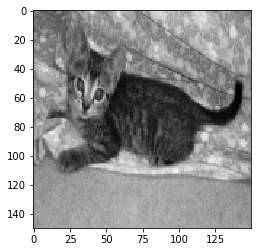

[1. 0.]


In [49]:
import matplotlib.pyplot as plt
plt.imshow(training_data[0][0],cmap='gray',interpolation='none')
plt.show()
print(training_data[0][1])

In [0]:
class NetConv(nn.Module):

  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1,16,3)
    self.conv2 = nn.Conv2d(16,32,3)
    self.conv3 = nn.Conv2d(32,64,3)
    x = torch.randn((150,150)).view(-1,1,150,150)
    x = self.convs(x)
    self.is_linear = torch.flatten(x,1,-1).shape[1]
    self.fc1 = nn.Linear(self.is_linear,512)
    self.fc2 = nn.Linear(512,2)

  def convs(self,x):
    x = func.max_pool2d(func.relu(self.conv1(x)),(2,2))
    x = func.max_pool2d(func.relu(self.conv2(x)),(2,2))
    x = func.max_pool2d(func.relu(self.conv3(x)),(2,2))
    return x

  def forward(self,x):
    x = self.convs(x)
    x = x.view(-1,self.is_linear)
    x = func.relu(self.fc1(x))
    x = self.fc2(x)
    return func.softmax(x,dim=1)





In [51]:
torch.cuda.is_available()

True

In [52]:
device = torch.device("cuda:0")
device

device(type='cuda', index=0)

In [53]:
if torch.cuda.is_available():
  net = NetConv().to(device)
else:
  net = NetConv()
print(net)

NetConv(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=18496, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=2, bias=True)
)


In [0]:
import torch.optim as optim
optimizer = optim.Adam(net.parameters(),lr=0.001)
loss_function = nn.BCELoss()
EPOCHS = 15

In [0]:
if torch.cuda.is_available():
  x_train = torch.Tensor([x[0] for x in training_data]).view(-1,150,150).to(device)
  x_train = x_train/255.0
  x_test = torch.Tensor([x[0] for x in testing_data]).view(-1,150,150).to(device)
  x_test = x_test/255.0
else:
  x_train = torch.Tensor([x[0] for x in training_data]).view(-1,150,150)
  x_train = x_train/255.0
  x_test = torch.Tensor([x[0] for x in testing_data]).view(-1,150,150)
  x_test = x_test/255.0

In [0]:
y_train = torch.Tensor([x[1] for x in training_data])
y_test = torch.Tensor([x[1] for x in testing_data])

In [58]:
len(y_train)

2000

In [0]:
batch_size = 100

In [60]:
for epoch in range(EPOCHS):
  for i in tqdm(range(0,len(y_train),batch_size)):
    if torch.cuda.is_available():
      batch_x = x_train[i:i+batch_size].view(-1,1,150,150).to(device)
      batch_y = y_train[i:i+batch_size].to(device)
    else:
      batch_x = x_train[i:i+batch_size].view(-1,1,150,150).to(device)
      batch_y = y_train[i:i+batch_size].to(device)
    net.zero_grad()
    output = net(batch_x)
    loss = loss_function(output,batch_y)
    loss.backward()
    optimizer.step()
  print("\n",loss)

 15%|█▌        | 3/20 [00:00<00:00, 21.02it/s]


 tensor(0.7014, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)


 15%|█▌        | 3/20 [00:00<00:00, 20.96it/s]


 tensor(0.6891, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)


 15%|█▌        | 3/20 [00:00<00:00, 21.00it/s]


 tensor(0.6997, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)


 15%|█▌        | 3/20 [00:00<00:00, 20.99it/s]


 tensor(0.7111, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)


 15%|█▌        | 3/20 [00:00<00:00, 20.99it/s]


 tensor(0.7044, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)


 15%|█▌        | 3/20 [00:00<00:00, 20.93it/s]


 tensor(0.6789, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)


 15%|█▌        | 3/20 [00:00<00:00, 20.93it/s]


 tensor(0.6238, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)


 15%|█▌        | 3/20 [00:00<00:00, 20.83it/s]


 tensor(0.6442, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)


 15%|█▌        | 3/20 [00:00<00:00, 20.95it/s]


 tensor(0.5708, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)


 15%|█▌        | 3/20 [00:00<00:00, 21.00it/s]


 tensor(0.5758, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)


 15%|█▌        | 3/20 [00:00<00:00, 21.03it/s]


 tensor(0.5499, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)


 15%|█▌        | 3/20 [00:00<00:00, 20.96it/s]


 tensor(0.4703, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)


 15%|█▌        | 3/20 [00:00<00:00, 20.96it/s]


 tensor(0.4163, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)


 15%|█▌        | 3/20 [00:00<00:00, 20.95it/s]


 tensor(0.3319, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)


100%|██████████| 20/20 [00:01<00:00, 16.71it/s]



 tensor(0.2324, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)


In [61]:
correct = 0
total = 0
with torch.no_grad():
  for i in tqdm(range(len(x_test))):
    actual = torch.argmax(y_test[i])
    output = net(x_test[i].view(-1,1,150,150))[0];
    predicted = torch.argmax(output)
    if predicted == actual:
      correct += 1
    total+=1
print('\nAccuracy is {0}'.format(correct/total))

100%|██████████| 1000/1000 [00:00<00:00, 1182.08it/s]


Accuracy is 0.672


dog


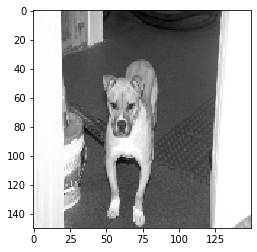

In [62]:
output = torch.argmax(net(x_test[0].view(-1,1,150,150))[0])
if output == 1:
  print("dog")
else:
  print("cat")
plt.imshow(torch.Tensor.cpu(x_test[0]),cmap="gray")

cat


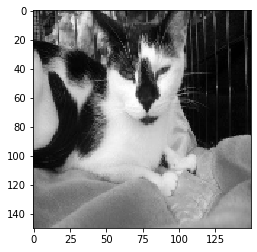

In [63]:
output = torch.argmax(net(x_test[8].view(-1,1,150,150))[0])
if output == 1:
  print("dog")
else:
  print("cat")
plt.imshow(torch.Tensor.cpu(x_test[8]),cmap="gray")